<a href="https://colab.research.google.com/github/bugeki/portfolio_projects_of_data_analysis/blob/main/winequality_ML_model_as_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("winequality-red.csv")

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
df.loc[df["quality"]>=6, "Target"] = "High Quality"

In [ ]:
df["Target"].value_counts(dropna=False)

High Quality    855
NaN             744
Name: Target, dtype: int64

In [ ]:
df["Target"] = df["Target"].fillna("Low Quality")

In [ ]:
df.Target.value_counts(normalize=True) * 100

High Quality    53.470919
Low Quality     46.529081
Name: Target, dtype: float64

<AxesSubplot:>

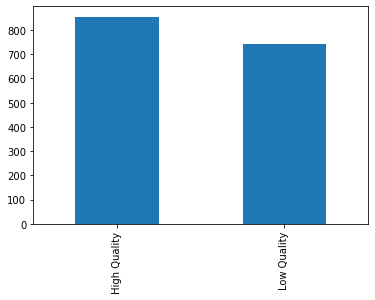

In [ ]:
df.Target.value_counts().plot(kind="bar")

# Metrik Seçimi

# accuracy as metric  

In [ ]:
df.shape

(1599, 13)

In [ ]:
df = df.drop("quality", axis=1)

In [ ]:
X = df.drop("Target", axis=1)
y = df.Target

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
y_train.value_counts(normalize=True)

High Quality    0.534793
Low Quality     0.465207
Name: Target, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

High Quality    0.534375
Low Quality     0.465625
Name: Target, dtype: float64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits=2)
results = cross_val_score(lasso, X, y, cv=skf)
cross_val_score()

In [ ]:
cross_val_score()

In [ ]:
models = []
models.append((KNeighborsClassifier(), "KNN"))
models.append((SVC(), "SVC"))
models.append((DecisionTreeClassifier(), "DT"))
models.append((LogisticRegression(), "LR"))
models.append((GradientBoostingClassifier(), "GB"))
models.append((RandomForestClassifier(), "RF"))
models.append((XGBClassifier(verbosity = 0), "XGB"))

In [ ]:
import cufflinks as cf
import plotly.offline

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [ ]:
results = []
names = []


for model, name in models:
    estimator = model
    skf = StratifiedKFold(n_splits=3)
    result = cross_val_score(estimator, X_train, y_train, cv=skf, scoring="accuracy")
    print(f"{name}: {result.mean().round(3)}")
    results.append(result)
    names.append(name)
    
results_df = pd.DataFrame(results, index=names, columns=[i for i in range(1, len(result)+1)])
results_df

KNN: 0.632
SVC: 0.618
DT: 0.725
LR: 0.744
GB: 0.773
RF: 0.804
XGB: 0.783


,1,2,3
KNN,0.662763,0.610329,0.622066
SVC,0.592506,0.629108,0.633803
DT,0.709602,0.748826,0.715962
LR,0.744731,0.758216,0.730047
GB,0.744731,0.802817,0.772300
RF,0.765808,0.840376,0.805164
XGB,0.775176,0.793427,0.781690


In [ ]:
results_df.T.iplot(kind="box", boxpoints="all")

# Pipeline

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer, MinMaxScaler, RobustScaler

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Target
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Low Quality
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Low Quality
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Low Quality
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,High Quality
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Low Quality
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,Low Quality
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,High Quality
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,High Quality
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,Low Quality


In [ ]:
preprocessor = ColumnTransformer(transformers=[('boxcox',
                                 Pipeline(steps=[('scaler', RobustScaler())]),
                                 
                                ['fixed acidity', 'volatile acidity',
                                  'citric acid']),
                                               
                                            ('standard',
                                             Pipeline(steps=[('scaler', MinMaxScaler())]),
                                             ['residual sugar', 'chlorides',
                                              'free sulfur dioxide', 'total sulfur dioxide',
                                              'density', 'pH', 'sulphates', 'alcohol'])
                                              ])

In [ ]:
col = ColumnTransformer(transformers=[
    ("scaler", StandardScaler(), [bazılarına]),
    ("minmax", MinMaxScaler(), [bazılarına]),
    ("ohe", OneHotEncoder(), [categorical])
    
])


estimator = Pipeline(
    
    steps=[
        ("a", col),
        ("model", model())
    ]

    )

NameError: name 'bazılarına' is not defined

In [ ]:
results = []
names = []


for model, name in models:
    estimator = Pipeline(
        steps=[("preprocessor", preprocessor), ("classifier", model)]
    )
    skf = StratifiedKFold(n_splits=3)
    result = cross_val_score(estimator, X_train, y_train, cv=skf, scoring="accuracy")
    print(f"{name}: {result.mean().round(3)}")
    results.append(result)
    names.append(name)
    
results_df = pd.DataFrame(results, index=names, columns=[i for i in range(1, len(result)+1)])
results_df

KNN: 0.678
SVC: 0.739
DT: 0.698
LR: 0.745
GB: 0.77
RF: 0.771
XGB: 0.774


,1,2,3
KNN,0.658080,0.683099,0.692488
SVC,0.723653,0.753521,0.739437
DT,0.658080,0.699531,0.737089
LR,0.740047,0.741784,0.753521
GB,0.747073,0.772300,0.791080
RF,0.754098,0.788732,0.769953
XGB,0.763466,0.779343,0.779343


In [ ]:
results_df.T.iplot(kind="box", boxpoints="all")